In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [109]:
data.select_dtypes(include='number').corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [111]:
df = data[['GrLivArea', 'OverallQual', 'GarageCars', 'GarageArea', 'SalePrice']].copy()
df.head()

,GrLivArea,OverallQual,GarageCars,GarageArea,SalePrice
0,1710,7,2,548,208500
1,1262,6,2,460,181500
2,1786,7,2,608,223500
3,1717,7,3,642,140000
4,2198,8,3,836,250000


In [113]:
df.isnull().sum()
df.dropna(inplace=True)
print("After dropna:", data.shape)


After dropna: (1460, 81)


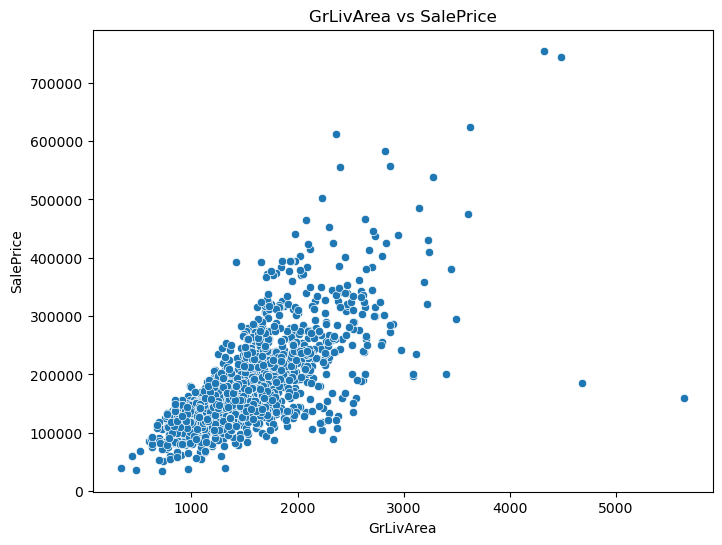

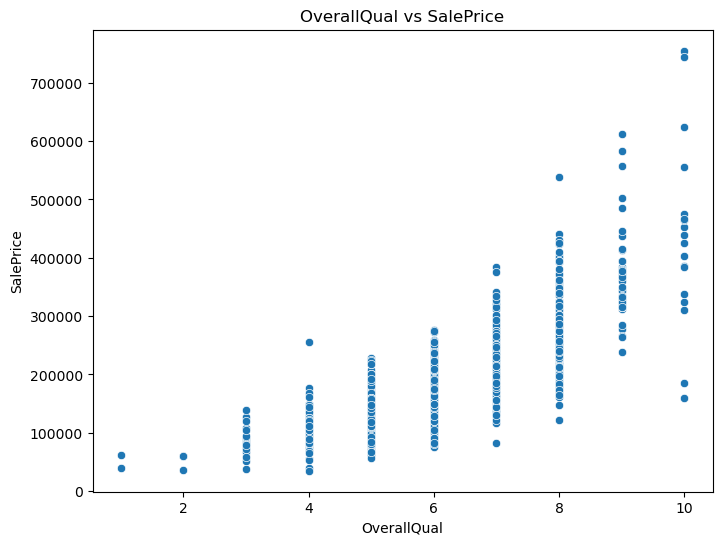

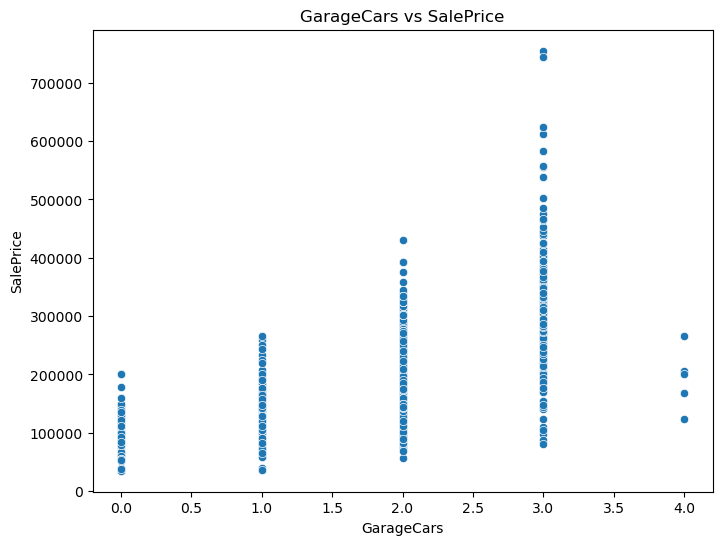

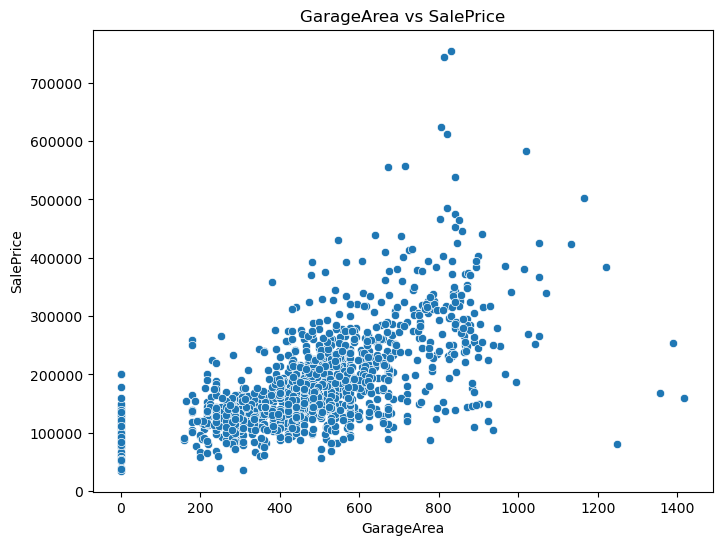

In [115]:
selected_features = ['GrLivArea', 'OverallQual', 'GarageCars', 'GarageArea', 'SalePrice']

for feature in selected_features:
    if feature != 'SalePrice':  # Don't plot SalePrice vs itself
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=data[feature], y=data['SalePrice'])
        plt.title(f"{feature} vs SalePrice")
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()
    

In [117]:
data=data[data['GrLivArea']<4000]
data=data[data['GarageCars']<4]
data=data[data['GarageArea']<1200]
data=data[data['SalePrice']<600000]

In [119]:
X= df[['GrLivArea', 'OverallQual', 'GarageCars', 'GarageArea']] #feature
Y=df['SalePrice'] #Target

In [121]:
Scaler= StandardScaler()
X_Scaled= Scaler.fit_transform(X)

In [123]:
X_train, X_test, Y_train, Y_test= train_test_split(X_Scaled, Y, test_size=0.2, random_state= 42) 

In [125]:
model= LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [127]:
y_pred= model.predict(X_test)

mse=mean_squared_error(Y_test, y_pred)
rmse=np.sqrt(mse)
r2= r2_score(Y_test, y_pred)

print("Rmse : ",rmse)
print("r2 Score : ",r2)


Rmse :  42682.00309294947
r2 Score :  0.7624933622354212


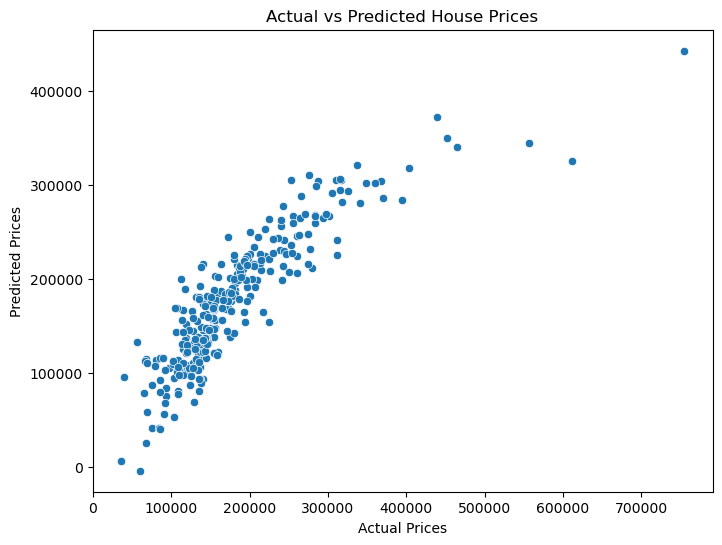

In [95]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y= y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [97]:
import joblib
joblib.dump(model, "house_price_model.pkl")


['house_price_model.pkl']

In [129]:
print("Data shape after outlier removal:", data.shape)
print("X shape:", X.shape)
print("y shape:", Y.shape)


Data shape after outlier removal: (1446, 81)
X shape: (1460, 4)
y shape: (1460,)


In [131]:
print("Data shape after outlier removal:", data.shape)


Data shape after outlier removal: (1446, 81)


In [135]:
area = float(input("Enter the Living Area (GrLivArea): "))
quality = int(input("Enter the Overall Quality (1-10): "))
garage_cars = int(input("Enter number of Garage Cars: "))
garage_area = float(input("Enter Garage Area: "))

custom_input = [[area, quality, garage_cars, garage_area]]
custom_input_scaled = Scaler.transform(custom_input)
predicted_price = model.predict(custom_input_scaled)

print("🏠 Estimated Price: ₹", round(predicted_price[0], 2))


Enter the Living Area (GrLivArea):  1800
Enter the Overall Quality (1-10):  7
Enter number of Garage Cars:  2
Enter Garage Area:  1200


🏠 Estimated Price: ₹ 247337.64


C:\Users\ravir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
